# Breast-Cancer-Wiscoin

## Step 1 : Importing all the libraries

In [1]:
import numpy as np,pandas as pd,matplotlib.pyplot as plt
from sklearn.cluster import KMeans
# from sklearn.preprocessing import Imputer
from sklearn.model_selection  import train_test_split
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

## Step 2 : Loading the dataset


#### we can also download the data set from : https://www.kaggle.com/uciml/breast-cancer-wisconsin-data


=============================================

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        - class:
                - WDBC-Malignant
                - WDBC-Benign

    :Summary Statistics:

    ===================================== ====== ======
                                           Min    Max
    ===================================== ====== ======
    radius (mean):                        6.981  28.11
    texture (mean):                       9.71   39.28
    perimeter (mean):                     43.79  188.5
    area (mean):                          143.5  2501.0
    smoothness (mean):                    0.053  0.163
    compactness (mean):                   0.019  0.345
    concavity (mean):                     0.0    0.427
    concave points (mean):                0.0    0.201
    symmetry (mean):                      0.106  0.304
    fractal dimension (mean):             0.05   0.097
    radius (standard error):              0.112  2.873
    texture (standard error):             0.36   4.885
    perimeter (standard error):           0.757  21.98
    area (standard error):                6.802  542.2
    smoothness (standard error):          0.002  0.031
    compactness (standard error):         0.002  0.135
    concavity (standard error):           0.0    0.396
    concave points (standard error):      0.0    0.053
    symmetry (standard error):            0.008  0.079
    fractal dimension (standard error):   0.001  0.03
    radius (worst):                       7.93   36.04
    texture (worst):                      12.02  49.54
    perimeter (worst):                    50.41  251.2
    area (worst):                         185.2  4254.0
    smoothness (worst):                   0.071  0.223
    compactness (worst):                  0.027  1.058
    concavity (worst):                    0.0    1.252
    concave points (worst):               0.0    0.291
    symmetry (worst):                     0.156  0.664
    fractal dimension (worst):            0.055  0.208
    ===================================== ====== ======

    

    :Class Distribution: 212 - Malignant, 357 - Benign

In [2]:
#importing the dataset
df=pd.read_csv('breast-data.csv')

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Step 3- Preprocessing


#### Exploratory Data Analysis

In [3]:
df.shape

(569, 33)

In [4]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [6]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [7]:
# Let's chk unique values in diagnosis

df['diagnosis'].unique()

# M -- Malignant --  cancerous  -- 1
#  B- Benign -- non cancerous -- 0

array(['M', 'B'], dtype=object)

In [8]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

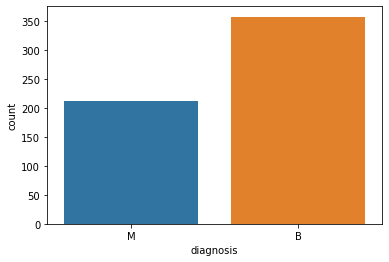

In [9]:
sns.countplot(df['diagnosis'])

#### Data Cleaning

In [10]:
#  chking for null values
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

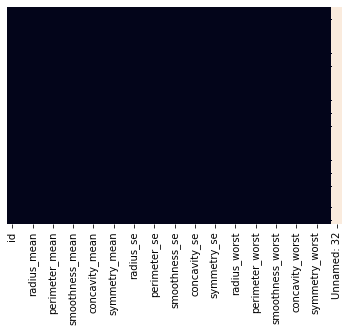

In [11]:
# check for nan values using heatmap
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

So from the above heatmap we can see that all the values present in 'unnamed 32' are null. So we have to drop it .
Also we have to drop 'id' attribute as it is irrelvant to the project

In [12]:
df = df.drop(['Unnamed: 32','id'], axis=1)
df.shape

(569, 31)

#### Visualization

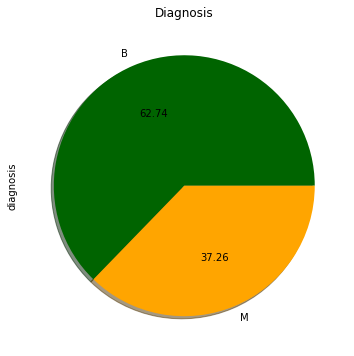

In [13]:
df.diagnosis.value_counts().plot(kind='pie',shadow=True,colors=('darkgreen','orange'),autopct='%.2f',figsize=(8,6))
plt.title('Diagnosis')
plt.show()

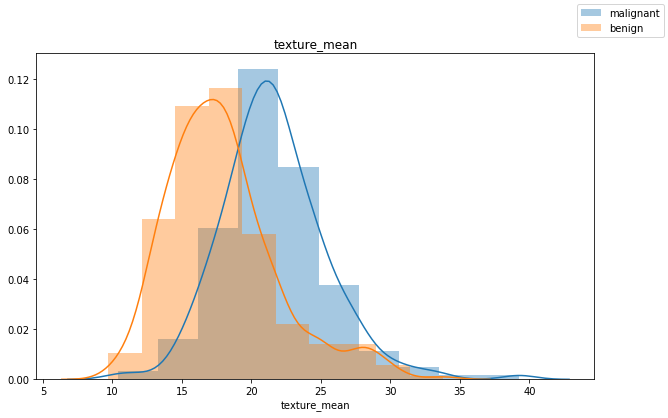

<Figure size 720x432 with 0 Axes>

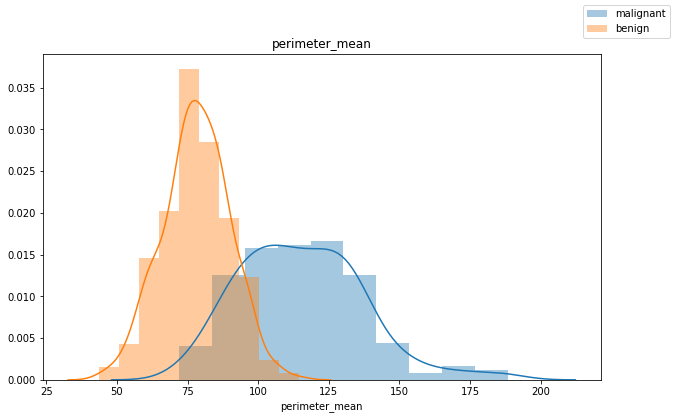

<Figure size 720x432 with 0 Axes>

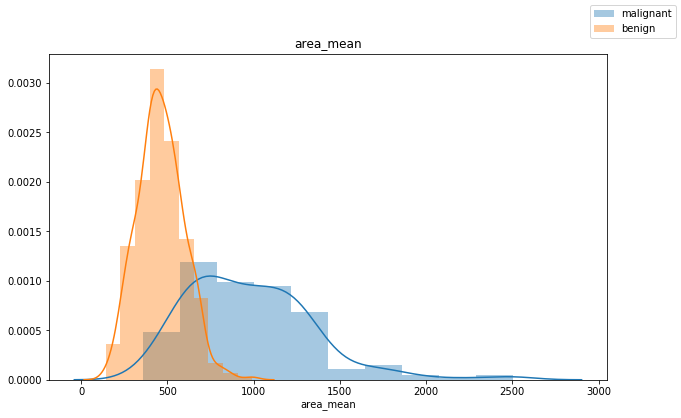

<Figure size 720x432 with 0 Axes>

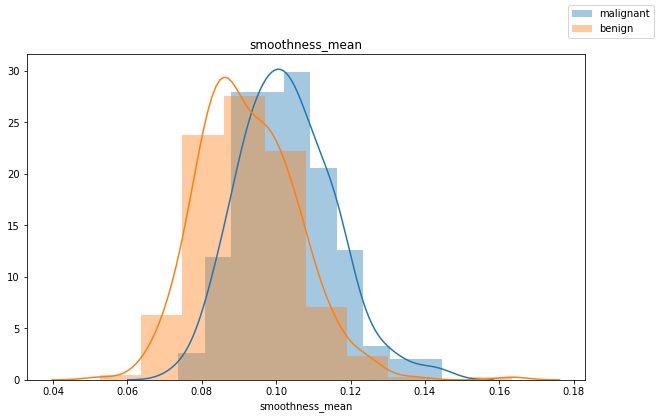

<Figure size 720x432 with 0 Axes>

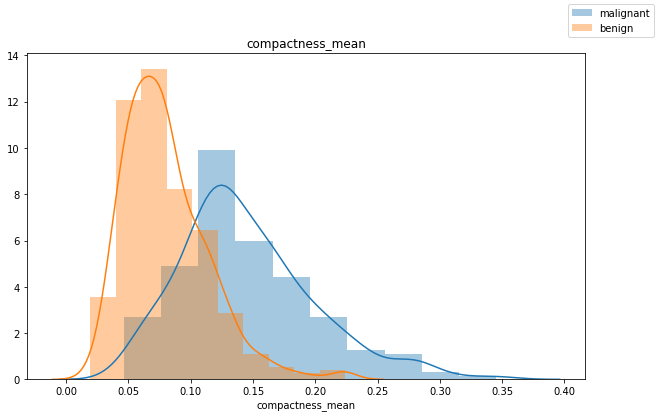

<Figure size 720x432 with 0 Axes>

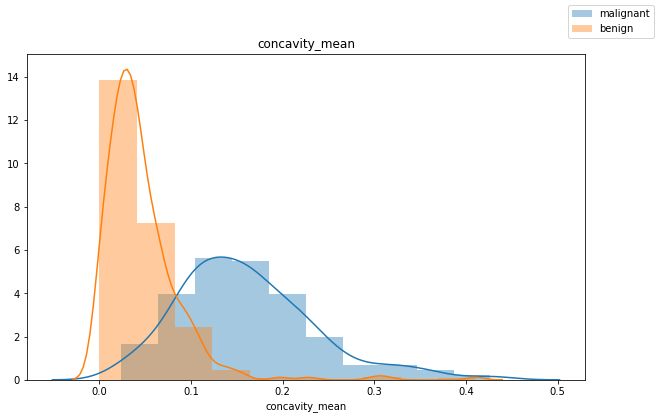

<Figure size 720x432 with 0 Axes>

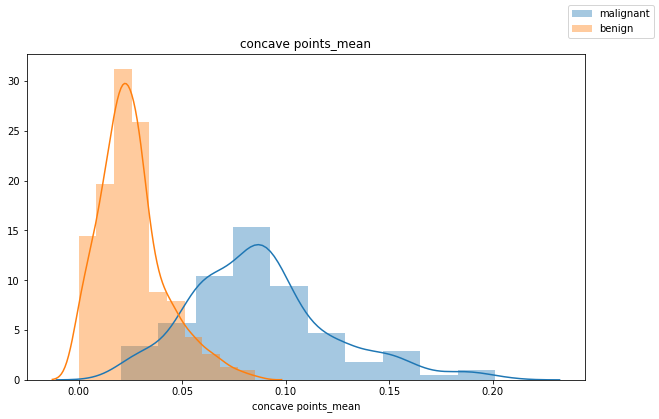

<Figure size 720x432 with 0 Axes>

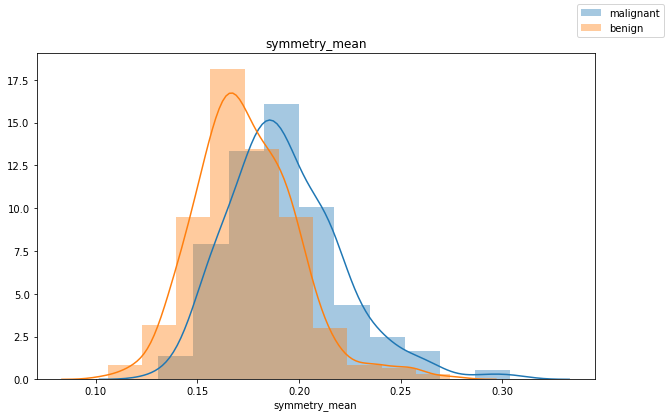

<Figure size 720x432 with 0 Axes>

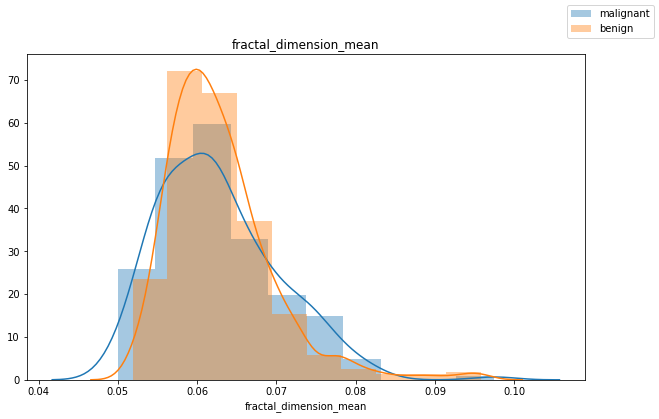

<Figure size 720x432 with 0 Axes>

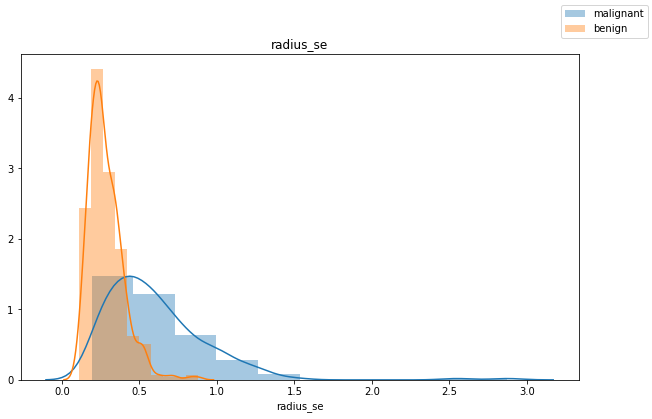

<Figure size 720x432 with 0 Axes>

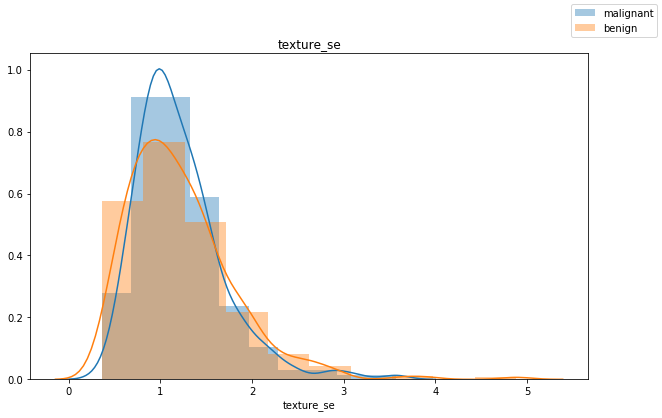

<Figure size 720x432 with 0 Axes>

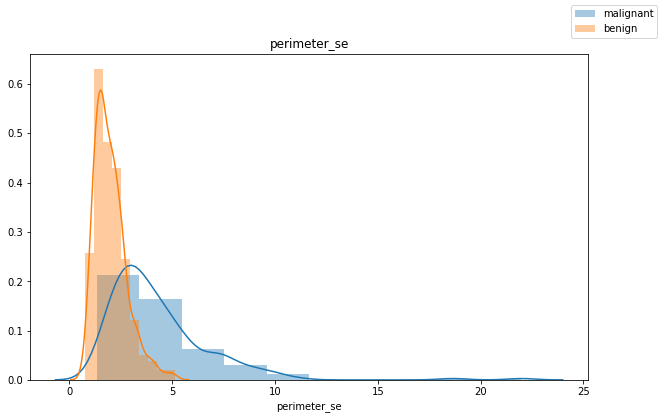

<Figure size 720x432 with 0 Axes>

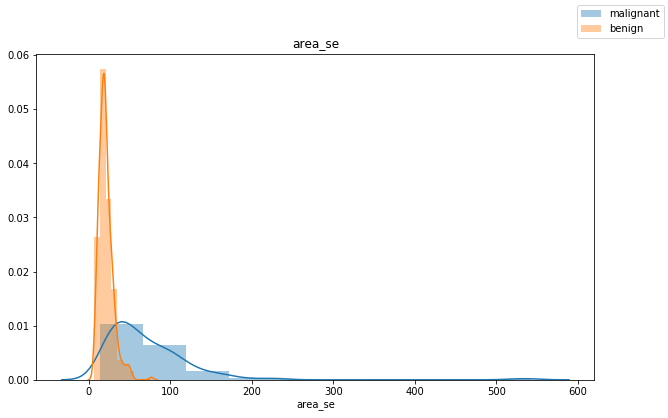

<Figure size 720x432 with 0 Axes>

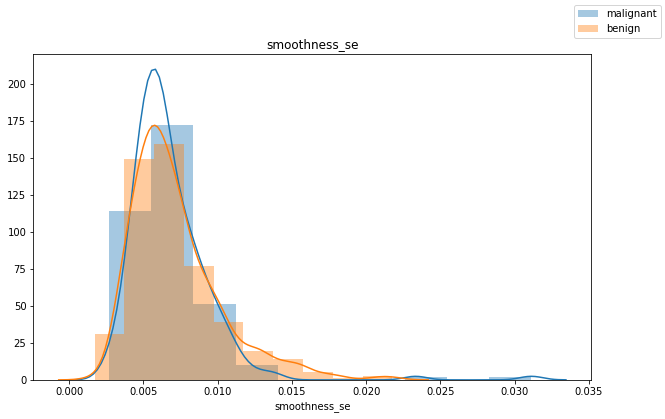

<Figure size 720x432 with 0 Axes>

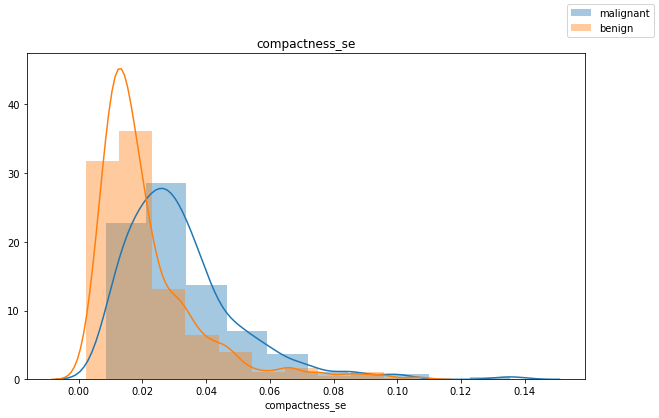

<Figure size 720x432 with 0 Axes>

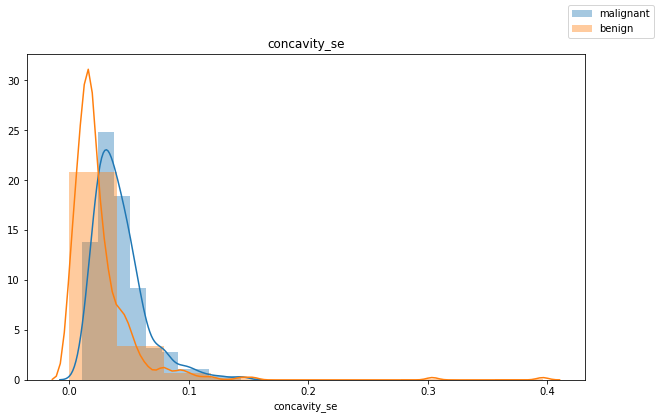

<Figure size 720x432 with 0 Axes>

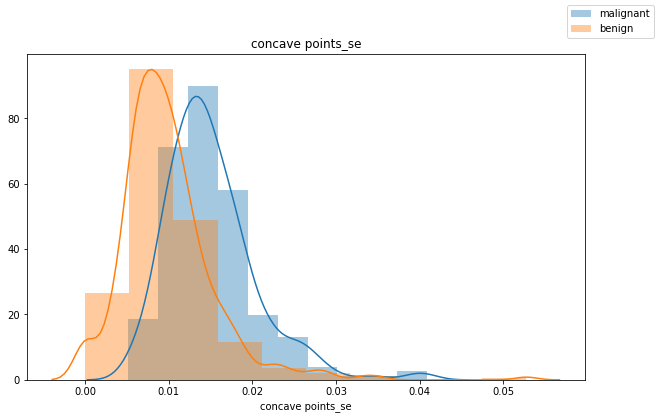

<Figure size 720x432 with 0 Axes>

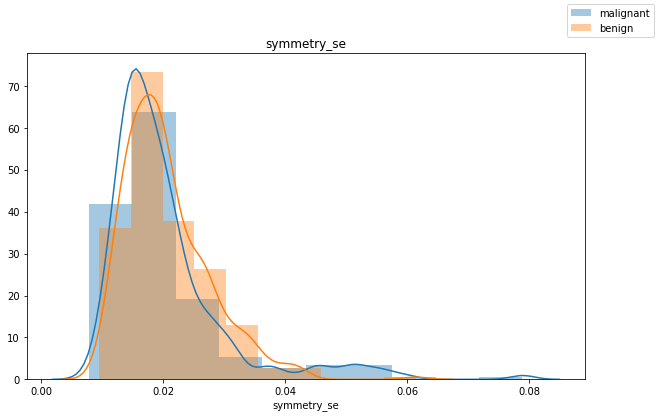

<Figure size 720x432 with 0 Axes>

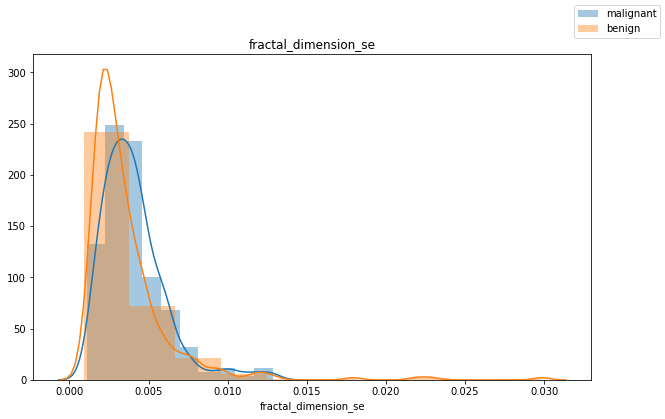

<Figure size 720x432 with 0 Axes>

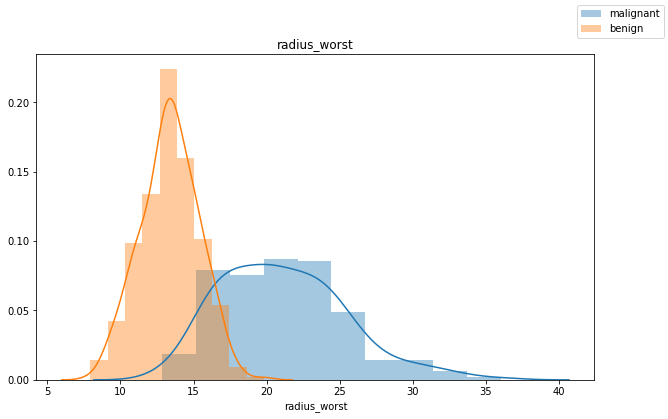

<Figure size 720x432 with 0 Axes>

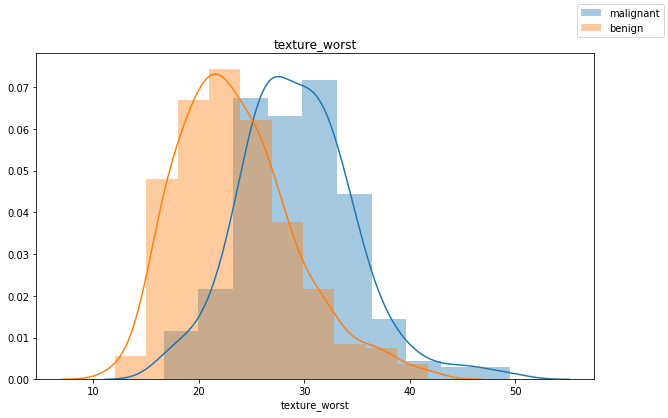

<Figure size 720x432 with 0 Axes>

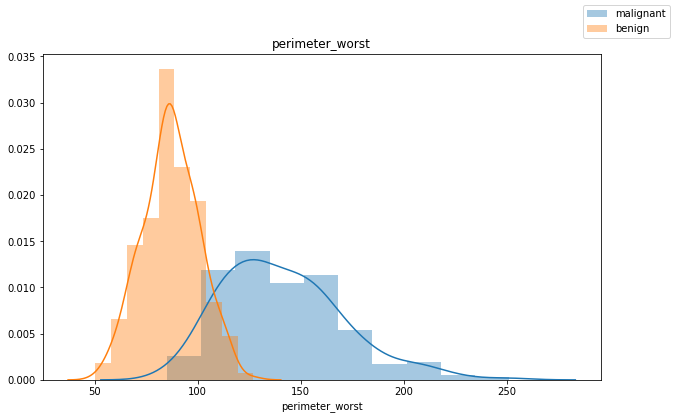

<Figure size 720x432 with 0 Axes>

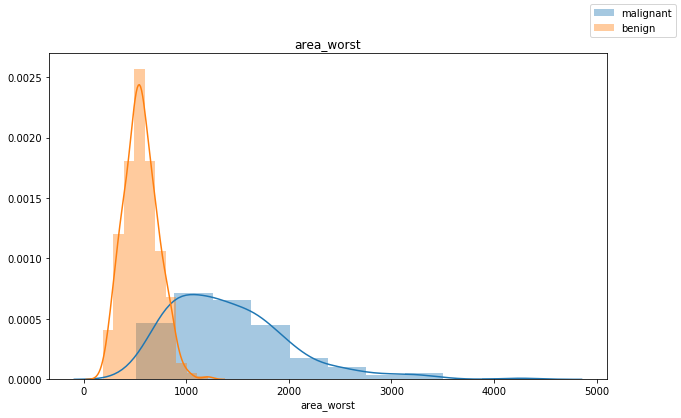

<Figure size 720x432 with 0 Axes>

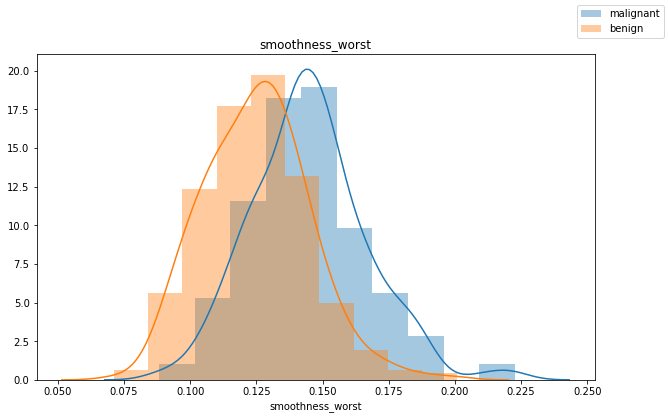

<Figure size 720x432 with 0 Axes>

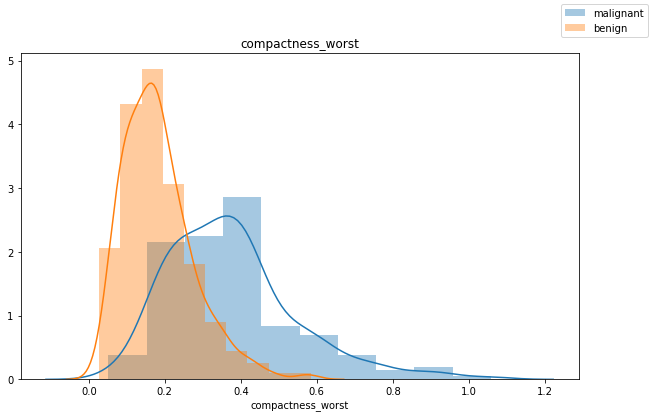

<Figure size 720x432 with 0 Axes>

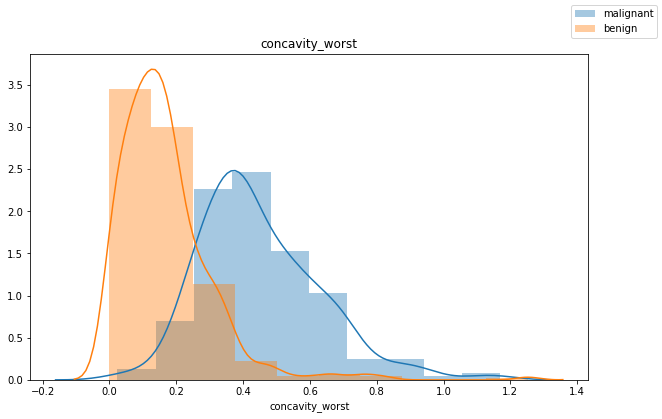

<Figure size 720x432 with 0 Axes>

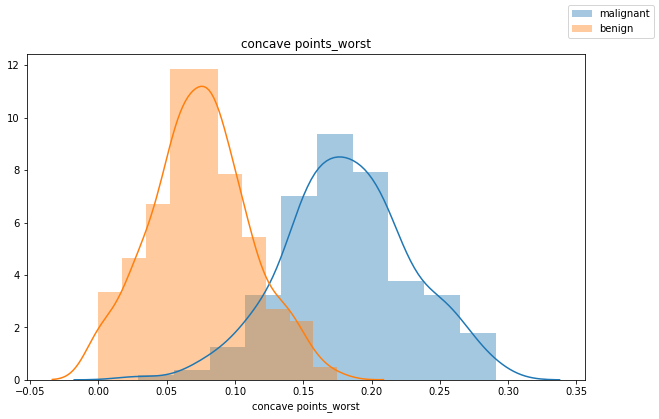

<Figure size 720x432 with 0 Axes>

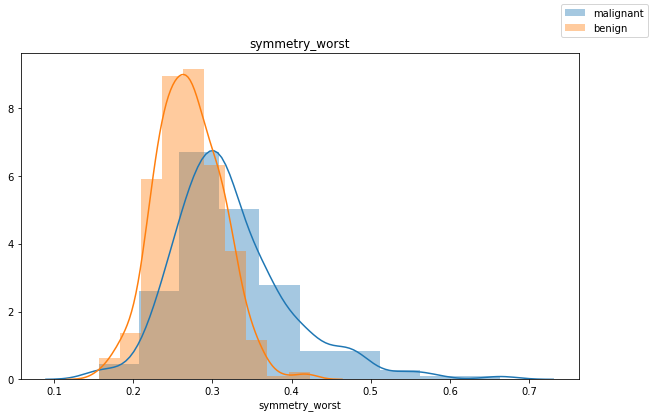

<Figure size 720x432 with 0 Axes>

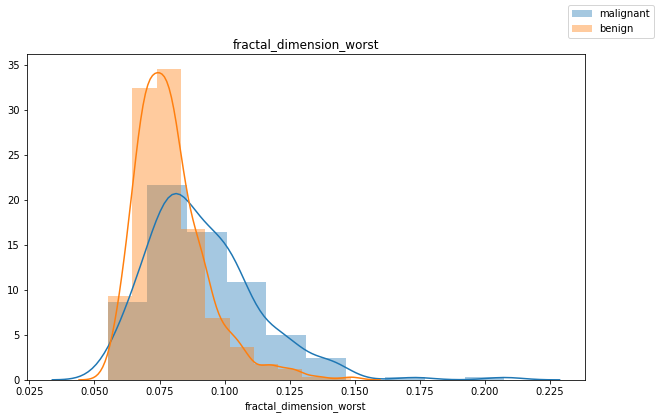

<Figure size 720x432 with 0 Axes>

In [14]:
# plotting distributed plot
cancer_data = df.copy()
for i in range(len(cancer_data.columns[2:])):
    fig = plt.figure(figsize=(10,6))
    sns.distplot(cancer_data.loc[cancer_data['diagnosis'] == 'M'][str(cancer_data.columns[2:][i])],10)
    sns.distplot(cancer_data.loc[cancer_data['diagnosis'] == 'B'][str(cancer_data.columns[2:][i])],10)
    fig.legend(labels=['malignant','benign'])
    plt.title(str(cancer_data.columns[2:][i]))
    plt.figure(figsize=(10,6))
    plt.show()

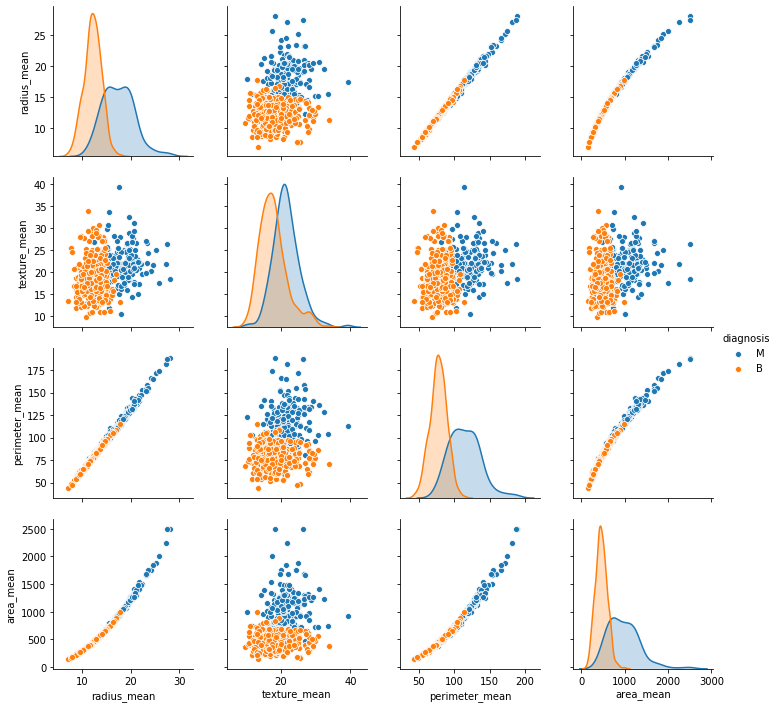

In [15]:
# pairplot
sns.pairplot(cancer_data[["diagnosis", "radius_mean", "texture_mean", "perimeter_mean", "area_mean"]],hue="diagnosis")

In [16]:
# converting to 0 and 1

a= {'M':1,'B':0}
df['diagnosis'] = df['diagnosis'].replace(a)

# or, also we can use labelencoder

In [17]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,1,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,1,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,1,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
5,1,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
6,1,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
7,1,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
8,1,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
9,1,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750


In [18]:
df.diagnosis.unique()

array([1, 0], dtype=int64)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null int64
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 no

In [20]:
df.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


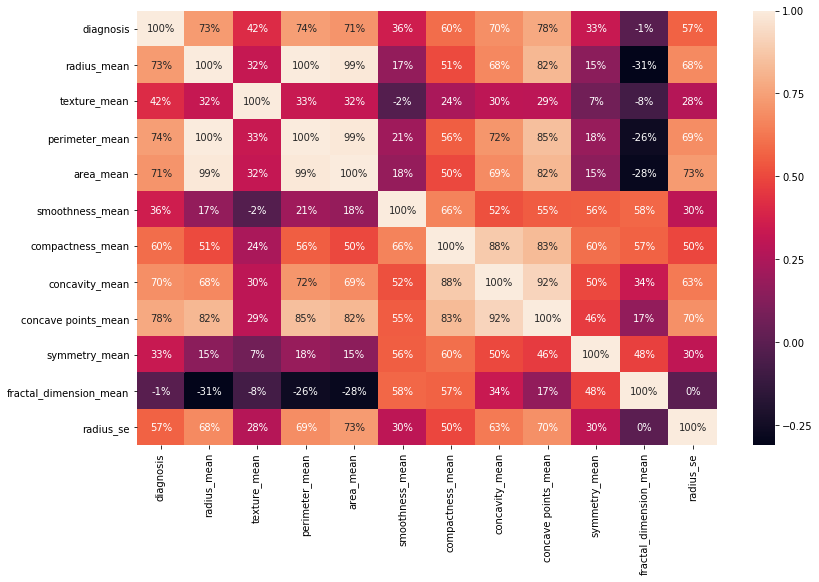

In [21]:
# plotting heatmap of corelation
df_corr = df.iloc[:,0:12].corr()
plt.figure(figsize=(13,8))
sns.heatmap(df_corr,annot=True,fmt='.0%')

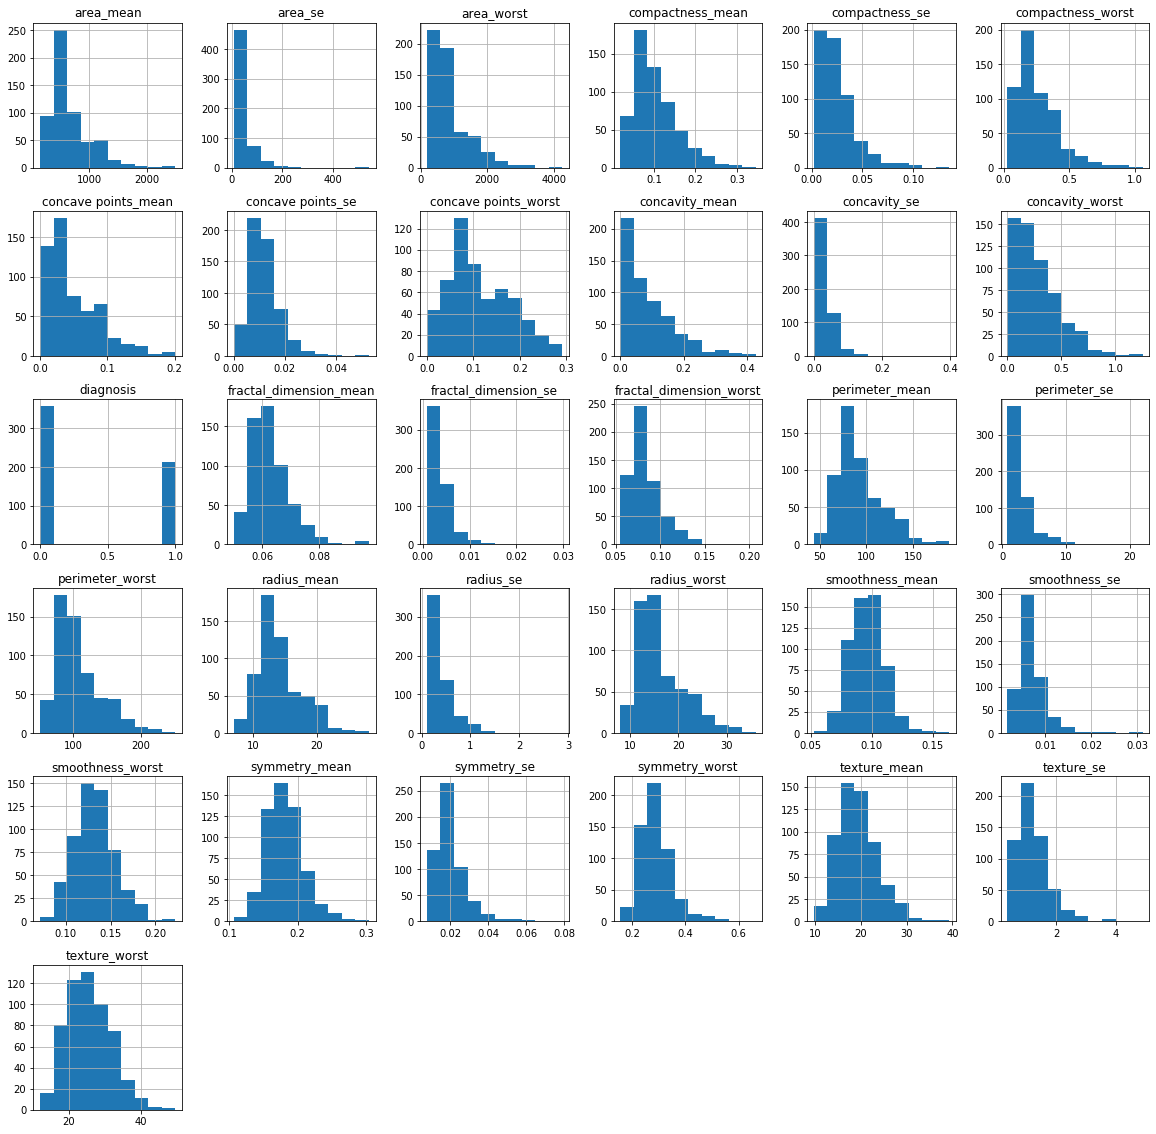

In [22]:
# plotting histogram graph
df.hist(figsize=(20,20))
plt.show()

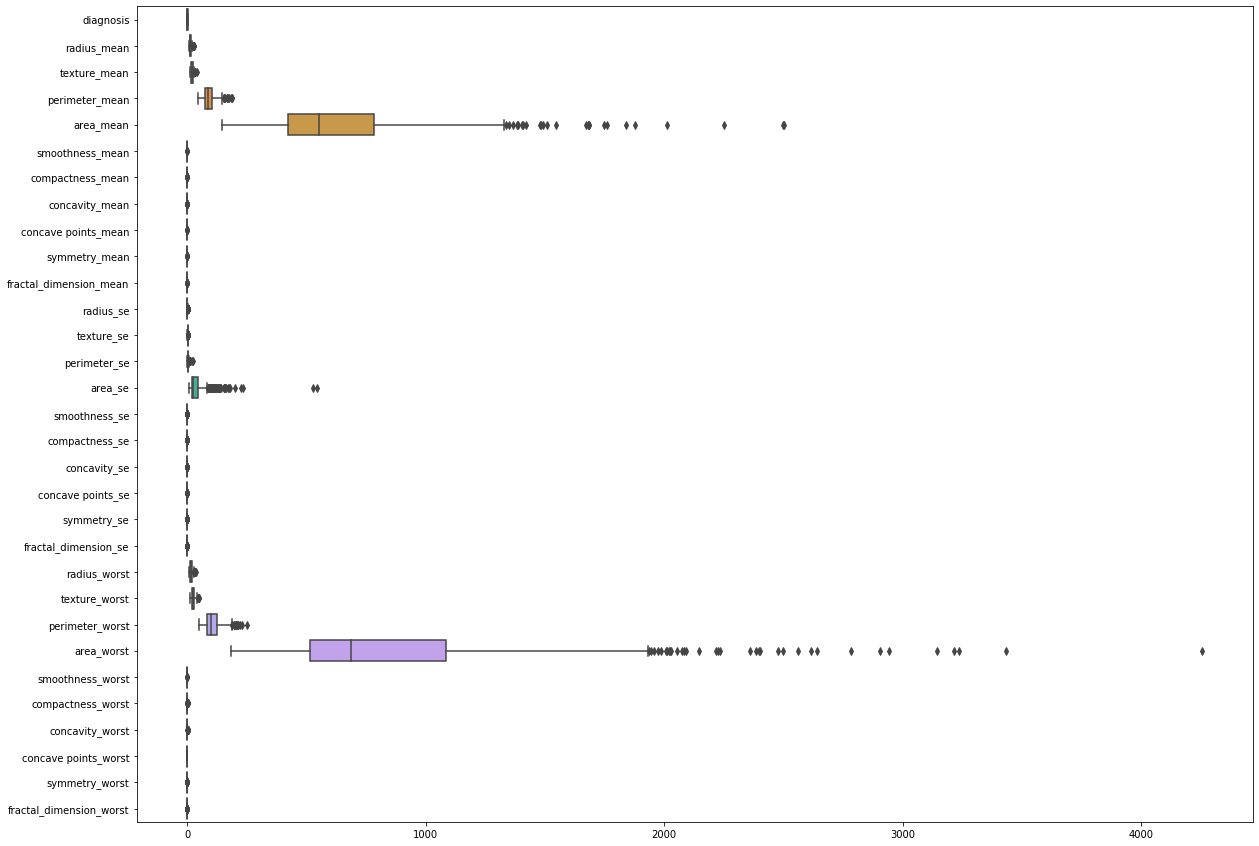

In [23]:
# plotting boxplot to identifies the outlier
plt.figure(figsize=(20,15))
sns.boxplot(data=df,orient='h')
plt.show()

## Step 4 : Splitting into dependant and independant variables

In [24]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics

In [25]:
# slicing of  df dataset  to get independent(X/source) and dependent(y/target) variables
X = df.drop(['diagnosis'],axis=1)
y = df.diagnosis

In [26]:
X.shape

(569, 30)

In [27]:
y.shape

(569,)

## Step 5 : Splitting the datasets into 75% traning and 25% testing

In [28]:
# Splitting the datasets into 75% traning and 25% testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


In [29]:
print('The size of x_train :',X_train.shape)
print('The size of x_test :',X_test.shape)
print('The size of y_train :',Y_train.shape)
print('The size of y_test :',Y_test.shape)

The size of x_train : (426, 30)
The size of x_test : (143, 30)
The size of y_train : (426,)
The size of y_test : (143,)


## Step 6 : Feature Scaling

In [30]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

# Scale the data to bring all features to the same level of magnitude, 
# which means the feature / independent data will be within a specific range for example 0–100 or 0–1.

In [31]:
print(X_train)

print('---------------')
print(X_test)

[[-0.65079907 -0.43057322 -0.68024847 ... -0.36433881  0.32349851
  -0.7578486 ]
 [-0.82835341  0.15226547 -0.82773762 ... -1.45036679  0.62563098
  -1.03071387]
 [ 1.68277234  2.18977235  1.60009756 ...  0.72504581 -0.51329768
  -0.96601386]
 ...
 [-1.33114223 -0.22172269 -1.3242844  ... -0.98806491 -0.69995543
  -0.12266325]
 [-1.25110186 -0.24600763 -1.28700242 ... -1.75887319 -1.56206114
  -1.00989735]
 [-0.74662205  1.14066273 -0.72203706 ... -0.2860679  -1.24094654
   0.2126516 ]]
---------------
[[-0.21395901  0.3125461  -0.14355187 ...  1.37043754  1.08911166
   1.53928319]
 [-0.26750714  1.461224   -0.32955207 ... -0.84266106 -0.71577388
  -0.88105993]
 [-0.03922298 -0.86770223 -0.10463112 ... -0.505318   -1.20298225
  -0.92494342]
 ...
 [-0.51270124 -1.69096186 -0.54095317 ... -0.12632201  0.33773512
  -0.42872244]
 [-0.17732081 -2.01395163 -0.17345939 ... -0.62875108 -0.29500302
  -0.65432858]
 [ 1.5305829  -0.26300709  1.57961296 ...  1.6694843   1.18085869
   0.48889253]]


## Step 7 : Model Selection

### Train the model

In [32]:
def models(X_train,Y_train):
    
  
  #Using Logistic Regression 
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state = 0)
  log.fit(X_train, Y_train)
  
  
  #Using KNeighborsClassifier 
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
  knn.fit(X_train, Y_train)

  #Using SVC linear
  from sklearn.svm import SVC
  svc_lin = SVC(kernel = 'linear', random_state = 0)
  svc_lin.fit(X_train, Y_train)

  #Using SVC rbf
  from sklearn.svm import SVC
  svc_rbf = SVC(kernel = 'rbf', random_state = 0)
  svc_rbf.fit(X_train, Y_train)

  #Using GaussianNB 
  from sklearn.naive_bayes import GaussianNB
  gauss = GaussianNB()
  gauss.fit(X_train, Y_train)

  #Using DecisionTreeClassifier 
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  tree.fit(X_train, Y_train)

  #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
  forest.fit(X_train, Y_train)
  

  algos=['Logistic Regression','K Nearest Neighbor','SVM(Linear Classifier)',
         'SVM(RBF Classifier)','Naive Bayes','Decision Tree','Random Forest'] 
  
  accuracy = [log.score(X_train, Y_train),knn.score(X_train, Y_train),
              svc_lin.score(X_train, Y_train),svc_rbf.score(X_train, Y_train),
              gauss.score(X_train, Y_train),tree.score(X_train, Y_train),forest.score(X_train, Y_train)]
    
  
  
  for i in range(7):
      print([i],'{} Training Accuracy: {} %'.format(algos[i],round((accuracy[i])*100,2)))
  
  print("")
  print("Plotting accuracy Barplot......")
  color=['green','#0FBBAE','purple','red','orange','magenta','cyan']
  sns.set_style('whitegrid')
  plt.figure(figsize=(15,6)) #size of the graph
  plt.ylabel('Accuracy(%)')
  plt.title("Algorithm prediction")
  plt.xlabel('Algorithms')
  sns.barplot(x=algos,y=accuracy,palette=color)  
  plt.show()
  
    
  # using zip() to convert lists to dictionary
  training_acc = dict(zip(algos, accuracy))
  

  max_key = max(training_acc, key=training_acc.get)
  max_value = max(training_acc.values())

  print('The maximum training accuracy is given by {} model at {} %'.format(max_key,round(max_value,2)*100))

  return log, knn, svc_lin, svc_rbf, gauss, tree, forest

[0] Logistic Regression Training Accuracy: 99.06 %
[1] K Nearest Neighbor Training Accuracy: 97.42 %
[2] SVM(Linear Classifier) Training Accuracy: 98.59 %
[3] SVM(RBF Classifier) Training Accuracy: 98.59 %
[4] Naive Bayes Training Accuracy: 94.84 %
[5] Decision Tree Training Accuracy: 100.0 %
[6] Random Forest Training Accuracy: 99.77 %

Plotting accuracy Barplot......


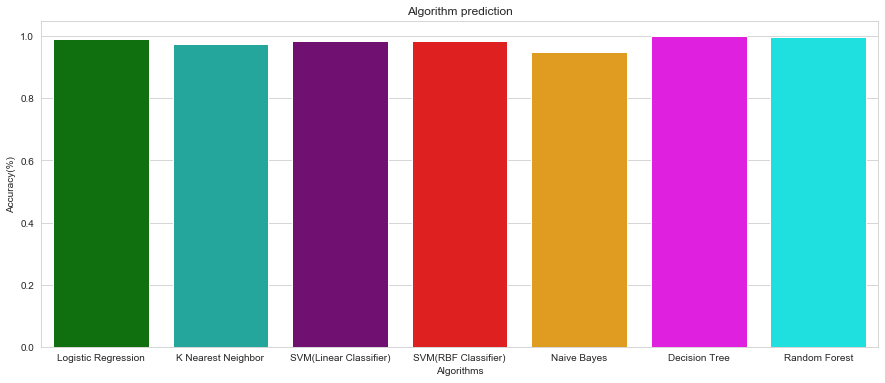

The maximum training accuracy is given by Decision Tree model at 100.0 %


In [33]:
model = models(X_train,Y_train)

In [34]:
model

(LogisticRegression(random_state=0),
 KNeighborsClassifier(),
 SVC(kernel='linear', random_state=0),
 SVC(random_state=0),
 GaussianNB(),
 DecisionTreeClassifier(criterion='entropy', random_state=0),
 RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0))

### Test the model

In [35]:
model_name=['Logistic Regression','K Nearest Neighbor','SVM(Linear Classifier)',
         'SVM(RBF Classifier)','Naive Bayes','Decision Tree','Random Forest']

In [36]:
# test model accuracy on test data on confusion matrix

from sklearn.metrics import confusion_matrix
cMatrix=[]
for i in range(len(model)):
  cm = confusion_matrix(Y_test, model[i].predict(X_test))
  cMatrix.append(cm)
  TN = cm[0][0]
  TP = cm[1][1]
  FN = cm[1][0]
  FP = cm[0][1]
  
  print(cm)
  print("")
  print('Model[{}] {} Testing Accuracy = {} %'.format(i, model_name[i], round((TP + TN) / (TP + TN + FN + FP)*100 ,2)))
  
  print('------------')

[[87  3]
 [ 3 50]]

Model[0] Logistic Regression Testing Accuracy = 95.8 %
------------
[[89  1]
 [ 6 47]]

Model[1] K Nearest Neighbor Testing Accuracy = 95.1 %
------------
[[88  2]
 [ 2 51]]

Model[2] SVM(Linear Classifier) Testing Accuracy = 97.2 %
------------
[[88  2]
 [ 3 50]]

Model[3] SVM(RBF Classifier) Testing Accuracy = 96.5 %
------------
[[84  6]
 [ 6 47]]

Model[4] Naive Bayes Testing Accuracy = 91.61 %
------------
[[86  4]
 [ 2 51]]

Model[5] Decision Tree Testing Accuracy = 95.8 %
------------
[[89  1]
 [ 1 52]]

Model[6] Random Forest Testing Accuracy = 98.6 %
------------


In [37]:
#Show other ways to get the classification accuracy & other metrics 

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,roc_auc_score
pred_lis=[]
for i in range(len(model)):
  print(f'Model {[i]} : {model_name[i]}')
  #Check precision, recall, f1-score
  print( classification_report(Y_test, model[i].predict(X_test)) )
  #Another way to get the models accuracy on the test data
  pred_lis.append(accuracy_score(Y_test, model[i].predict(X_test))*100)
  print( "Accuracy is: {} %".format(pred_lis[i]))
  print( "ROC AUC score is: {} %".format(roc_auc_score(Y_test, model[i].predict(X_test))*100))

  print('---------------------')

Model [0] : Logistic Regression
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        90
           1       0.94      0.94      0.94        53

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143

Accuracy is: 95.8041958041958 %
ROC AUC score is: 95.50314465408805 %
---------------------
Model [1] : K Nearest Neighbor
              precision    recall  f1-score   support

           0       0.94      0.99      0.96        90
           1       0.98      0.89      0.93        53

    accuracy                           0.95       143
   macro avg       0.96      0.94      0.95       143
weighted avg       0.95      0.95      0.95       143

Accuracy is: 95.1048951048951 %
ROC AUC score is: 93.78406708595388 %
---------------------
Model [2] : SVM(Linear Classifier)
              precision    recall  f1-score   support

         

In [38]:
pred_lis

[95.8041958041958,
 95.1048951048951,
 97.2027972027972,
 96.5034965034965,
 91.6083916083916,
 95.8041958041958,
 98.6013986013986]

In [39]:
    
data=list(zip(model_name,pred_lis))
result=pd.DataFrame(data,columns=['Model','Accuracy']).sort_values(["Accuracy"], ascending = False)
result

,Model,Accuracy
6,Random Forest,98.601399
2,SVM(Linear Classifier),97.202797
3,SVM(RBF Classifier),96.503497
0,Logistic Regression,95.804196
5,Decision Tree,95.804196
1,K Nearest Neighbor,95.104895
4,Naive Bayes,91.608392


In [40]:
maxAcc = dict(zip(model_name,pred_lis))
max_key = max(maxAcc, key=maxAcc.get)
max_value = max(maxAcc.values())

print('The maximum  accuracy is given by {} model at {} %'.format(max_key,max_value))
print()
print(f'So we are going to choose {max_key} model for our project')


The maximum  accuracy is given by Random Forest model at 98.6013986013986 %

So we are going to choose Random Forest model for our project


accuracy comparison:-


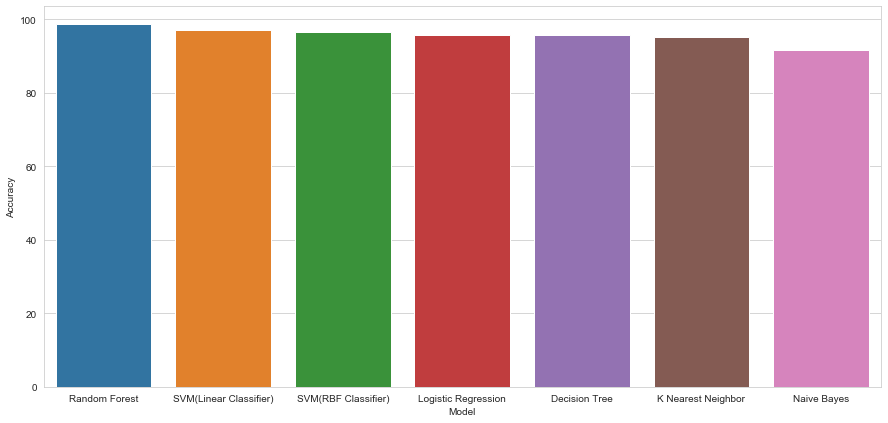

In [41]:
print("accuracy comparison:-")
plt.figure(figsize=(15,7))
sns.barplot(x = "Model", y = "Accuracy", data = result)
plt.show()

In [42]:
ind = list(dict(data).keys()).index(max_key)
ind

6

confusion matrix for Random Forest plotted below :-


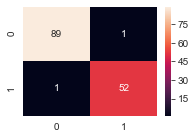

In [50]:
print(f'confusion matrix for {max_key} plotted below :-')
plt.figure(figsize=(3,2))
ax = sns.heatmap(cMatrix[ind], annot=True, fmt="d")
plt.show()

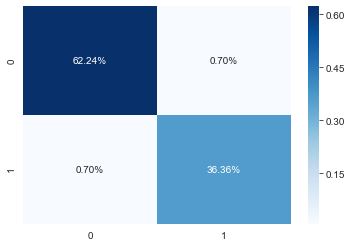

In [45]:
sns.heatmap(cMatrix[ind]/np.sum(cMatrix[ind]), annot=True, 
            fmt='.2%', cmap='Blues')

In [46]:
#Print Prediction of SVM model
pred = model[ind].predict(X_test)

print(pred)
print(pred.shape)

print('---------')

#Print the actual values
print(np.array(Y_test))


[1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1]
(143,)
---------
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1]


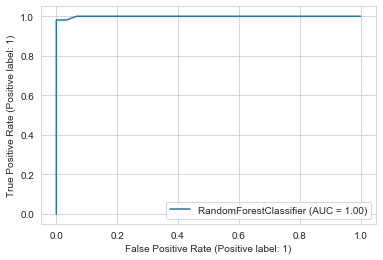

In [47]:
metrics.plot_roc_curve(model[ind], X_test, Y_test)  
plt.show() 

In [48]:
myFinalmodel = model[ind]
myFinalmodel

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

## Model export in pickle file for used as backend with django

In [49]:
pd.to_pickle(myFinalmodel,r'C:\Users\msahi\OneDrive\Desktop\Diseae Prediction\models\breast-cancer-randomForest.pickle')